In [88]:
import random
import scipy.stats as stats

def calcular_intervalo_confianca_gaussiana(tamanho_lista, media=100, desvio_padrao=10, nivel_confianca=0.90):
        """
        Gera uma lista de valores a partir de uma distribuição gaussiana e calcula o intervalo de confiança.

        Parâmetros:
        tamanho_lista (int): Número de valores a serem gerados.
        media (float): Média da distribuição gaussiana. Padrão é 100.
        desvio_padrao (float): Desvio padrão da distribuição gaussiana. Padrão é 10.
        nivel_confianca (float): Nível de confiança para o cálculo do intervalo. Padrão é 0.95 (95%).

        Retorna:
        tuple: Intervalo de confiança (limite inferior, limite superior) como uma tupla de floats.
        """
       

        # Gerando a lista de valores a partir da distribuição gaussiana
        valores_gaussianos = [random.gauss(media, desvio_padrao) for _ in range(tamanho_lista)]

        # Calculando a média dos valores
        media_lista = sum(valores_gaussianos) / len(valores_gaussianos)

        # Calculando o erro padrão da média (SEM)
        erro_padrao_lista = stats.sem(valores_gaussianos)

        # Calculando o intervalo de confiança paramétrico usando o SEM
        intervalo_confianca = stats.t.interval(nivel_confianca, len(valores_gaussianos)-1, loc=media_lista, scale=erro_padrao_lista)

        # Retornando a média e o intervalo de confiança como uma tupla
        intervalo_confianca_formatado = (media_lista, round(intervalo_confianca[0], 2), round(intervalo_confianca[1], 2))

        return intervalo_confianca_formatado


# Configurações para a simulação
tamanho_lista = 110
numero_simulacoes = 1000               ########### pode ser alterado  ############
contagem_dentro_do_intervalo = 0   # Gilberto: necessário para não acumular em duas rodadas

# Executando a simulação "numero_simulacoes" vezes
for _ in range(numero_simulacoes):
    resultado = calcular_intervalo_confianca_gaussiana(tamanho_lista)
    media_pop = 100
    limite_inferior = resultado[1]
    limite_superior = resultado[2]
    # print(resultado)
    
    # Verificando se a média está dentro do intervalo de confiança
    if limite_inferior <= media_pop <= limite_superior:
        contagem_dentro_do_intervalo += 1

# Imprimindo o número de vezes que a média está dentro do intervalo de confiança
print(f"Número de vezes que a média esteve dentro do intervalo de confiança: {contagem_dentro_do_intervalo} de {numero_simulacoes}")
print(f"Em termos percentuais: {round(contagem_dentro_do_intervalo/numero_simulacoes*100, 1)} %")


Número de vezes que a média esteve dentro do intervalo de confiança: 906 de 1000
Em termos percentuais: 90.6 %


Número de vezes que a média esteve dentro do intervalo de confiança: 18 de 20


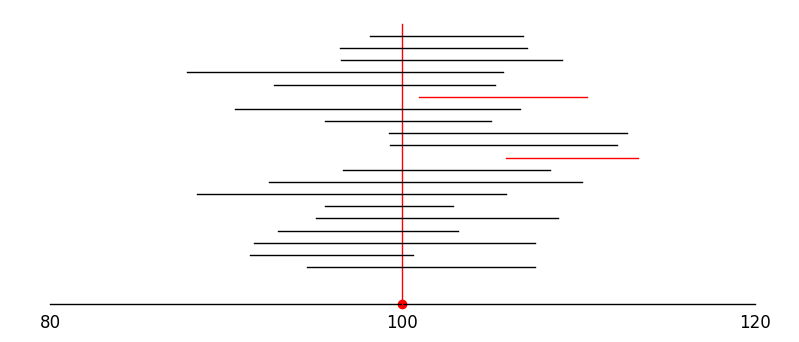

In [94]:
import random
import scipy.stats as stats

def calcular_intervalo_confianca_gaussiana(tamanho_lista, media=100, desvio_padrao=10, nivel_confianca=0.90):
        """
        Gera uma lista de valores a partir de uma distribuição gaussiana e calcula o intervalo de confiança.

        Parâmetros:
        tamanho_lista (int): Número de valores a serem gerados.
        media (float): Média da distribuição gaussiana. Padrão é 100.
        desvio_padrao (float): Desvio padrão da distribuição gaussiana. Padrão é 10.
        nivel_confianca (float): Nível de confiança para o cálculo do intervalo. Padrão é 0.95 (95%).

        Retorna:
        tuple: Intervalo de confiança (limite inferior, limite superior) como uma tupla de floats.
        """
       

        # Gerando a lista de valores a partir da distribuição gaussiana
        valores_gaussianos = [random.gauss(media, desvio_padrao) for _ in range(tamanho_lista)]

        # Calculando a média dos valores
        media_lista = sum(valores_gaussianos) / len(valores_gaussianos)

        # Calculando o erro padrão da média (SEM)
        erro_padrao_lista = stats.sem(valores_gaussianos)

        # Calculando o intervalo de confiança paramétrico usando o SEM
        intervalo_confianca = stats.t.interval(nivel_confianca, len(valores_gaussianos)-1, loc=media_lista, scale=erro_padrao_lista)

        # Retornando a média e o intervalo de confiança como uma tupla
        intervalo_confianca_formatado = (round(intervalo_confianca[0], 2), round(intervalo_confianca[1], 2))

        return intervalo_confianca_formatado


# Configurações para a simulação
tamanho_lista = 9         ### Tamanho da amostra   ###
numero_simulacoes = 20  # Por enquanto, esse valor é fixo, pois o desenho está preparado para represntar 20 barras    ####################
contagem_dentro_do_intervalo = 0   # Gilberto: necessário para não acumular em duas rodadas
intervalos_confianca = []
color = []

# Executando a simulação "numero_simulacoes" vezes
for _ in range(numero_simulacoes):
    resultado = calcular_intervalo_confianca_gaussiana(tamanho_lista)
    media_pop = 100
    limite_inferior = resultado[0]
    limite_superior = resultado[1]
    # print(resultado)
    
    # Verificando se a média está dentro do intervalo de confiança
    if limite_inferior <= media_pop <= limite_superior:
        contagem_dentro_do_intervalo += 1
        cor = 'black'
    else: cor = 'red'

    intervalos_confianca.append(resultado)
    color.append(cor)    #color is a list of strings
    
# Imprimindo o número de vezes que a média está dentro do intervalo de confiança
print(f"Número de vezes que a média esteve dentro do intervalo de confiança: {contagem_dentro_do_intervalo} de {numero_simulacoes}")
# print(intervalos_confianca)

#####################################
import matplotlib.pyplot as plt

# Criando a figura
plt.figure(figsize=(10, 4))

# Desenhando a reta horizontal REFERÊNCIA
plt.plot([80, 120], [-0, -0], color='black', lw=1)

# Adicionando ponto especial na reta
plt.scatter([100], [0], color='red')  # Ponto em 100
plt.text(100, -0.1, '100', ha='center', fontsize=12)

# Marcando os extremos da reta
plt.text(80, -0.1, '80', ha='center', fontsize=12)
plt.text(120, -0.1, '120', ha='center', fontsize=12)

# Desenhando reta vertical REFERÊNCIA
plt.plot([100, 100], [0, 1.15], color='red', lw=1)


# Coordenadas y para cada intervalo
y_coords = [1.1, 1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15]                ###################

# Loop para desenhar as 10 retas horizontais
for i in range(numero_simulacoes):                                     ################
    plt.plot(intervalos_confianca[i], [y_coords[i], y_coords[i]], color=color[i] , lw=1)    

# Removendo os eixos para focar apenas no desenho
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().xaxis.set_ticks([])
plt.gca().yaxis.set_ticks([])

# Exibindo o desenho
plt.show()
